<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Use and remove seasonality in time series

<br></font>
</div>

# Import modules

In [4]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

# Import dataset

In [2]:
series = read_csv('../DATASETS/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Seasonal Adjustment with Differencing

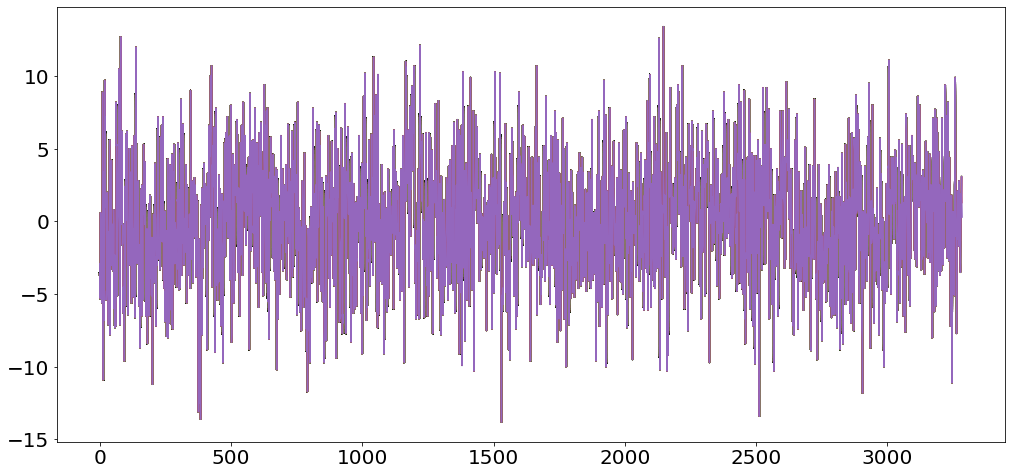

In [5]:
X = series.values
diff = list()
days_in_year = 365

for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)

    pyplot.plot(diff)
pyplot.show()

# Seasonal Adjustment with Modeling

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


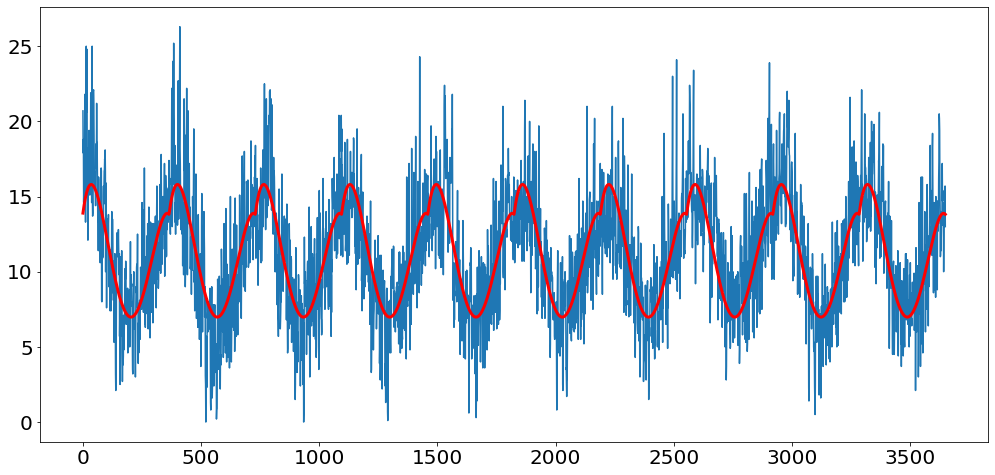

In [6]:
# does not take into account of leap days
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))] 
y = series.values
degree = 4
coef = polyfit(X, y, degree) 
print('Coefficients: %s' % coef)

# create curve
curve = list()

for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# plot curve over original data
pyplot.plot(series.values) 
pyplot.plot(curve, color='red', linewidth=3) 
pyplot.show()

# References

In [ ]:
<div class="alert alert-block alert-warning">
<font color=black><br>

- 

<br></font>
</div>